Project HRV fatigue.

In [1]:
import wfdb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("dark")

In [2]:
def read(file):
    '''
    read a .hea file and convert it to a dataframe
    '''
    w=wfdb.rdsamp(file)
    return(pd.DataFrame(data=w[0],columns=w[1]['sig_name']) )

In [3]:
w=wfdb.rdsamp('Data/s9_walk')

In [4]:
w

(array([[ 5.16407047e+01,  1.79926992e+03, -1.56203207e+01, ...,
          9.60378838e-02, -8.93620070e-01,  1.29972713e+01],
        [ 3.81431342e+01,  1.79341837e+03, -1.57870736e+01, ...,
          9.60378838e-02, -8.93620070e-01,  1.30009333e+01],
        [ 4.29922614e+01,  1.84468780e+03, -1.55999020e+01, ...,
          8.00911922e-02, -8.93620070e-01,  1.30045952e+01],
        ...,
        [ 6.12389770e+02,             nan,             nan, ...,
                     nan,             nan,             nan],
        [ 6.07540643e+02,             nan,             nan, ...,
                     nan,             nan,             nan],
        [ 6.47683417e+02,             nan,             nan, ...,
                     nan,             nan,             nan]]),
 {'fs': 256,
  'sig_len': 56321,
  'n_sig': 15,
  'base_date': None,
  'base_time': None,
  'units': ['mV',
   'mV',
   'degs^-1',
   'degs^-1',
   'degs^-1',
   'ms^-2',
   'ms^-2',
   'ms^-2',
   'ms^-2',
   'ms^-2',
   'ms^-2'

In [5]:
#df=read('s1_walk')

#######################
### filtered signal ###
#######################

df = np.load('filtered_signal.npy') # using filtered signal
df = pd.DataFrame(data={'filtered': df})

Now we will add the previous dataframe

In [6]:
df2 = read('Data/s9_walk')
df = pd.concat([df, df2], axis=1)
df.head(5)

,filtered,chest_ecg,wrist_ppg,wrist_gyro_x,wrist_gyro_y,wrist_gyro_z,wrist_low_noise_accelerometer_x,wrist_low_noise_accelerometer_y,wrist_low_noise_accelerometer_z,wrist_wide_range_accelerometer_x,wrist_wide_range_accelerometer_y,wrist_wide_range_accelerometer_z,wrist_mag_x,wrist_mag_y,wrist_mag_z,sample_times_for_all_signals_apart_from_ecg
0,0.038268,51.640705,1799.269923,-15.620321,-146.291367,116.383664,3.791152,-9.329793,1.622757,3.672590,-9.427104,1.577932,-0.223171,0.096038,-0.893620,12.997271
1,0.263236,38.143134,1793.418372,-15.787074,-143.192481,117.360723,3.791152,-9.329285,1.646969,3.711056,-9.388949,1.578823,-0.223171,0.096038,-0.893620,13.000933
2,0.920894,42.992261,1844.687803,-15.599902,-140.243300,118.436004,3.791366,-9.304383,1.695834,3.749310,-9.349909,1.618897,-0.230151,0.080091,-0.893620,13.004595
3,2.266744,43.292207,1825.629247,-15.644143,-137.526161,119.263143,3.767274,-9.267029,1.732482,3.748673,-9.348519,1.696931,-0.196949,0.090713,-0.897801,13.009173
4,4.522735,23.295807,1820.515976,-15.661158,-134.449731,119.847310,3.780279,-9.194481,1.770231,3.709675,-9.190972,1.775633,-0.209180,0.069455,-0.906163,13.012835


In [7]:
df.corr()

,filtered,chest_ecg,wrist_ppg,wrist_gyro_x,wrist_gyro_y,wrist_gyro_z,wrist_low_noise_accelerometer_x,wrist_low_noise_accelerometer_y,wrist_low_noise_accelerometer_z,wrist_wide_range_accelerometer_x,wrist_wide_range_accelerometer_y,wrist_wide_range_accelerometer_z,wrist_mag_x,wrist_mag_y,wrist_mag_z,sample_times_for_all_signals_apart_from_ecg
filtered,1.000000,-0.005728,0.204272,0.086638,-0.062419,0.121437,-0.075078,0.061984,-0.243195,-0.056838,0.062768,-0.238532,0.120078,-0.000075,-0.155319,-0.004482
chest_ecg,-0.005728,1.000000,-0.019144,-0.071625,-0.060207,0.073046,0.015403,-0.005385,0.036646,0.017197,-0.005246,0.036682,0.023095,-0.038067,-0.027712,-0.014821
wrist_ppg,0.204272,-0.019144,1.000000,0.205782,-0.032185,-0.086990,0.276471,0.318012,-0.180103,0.277834,0.315971,-0.181476,0.010666,0.011607,-0.060627,-0.002787
wrist_gyro_x,0.086638,-0.071625,0.205782,1.000000,0.665281,-0.920085,-0.031399,0.126020,-0.547320,-0.023029,0.127857,-0.542335,0.110176,0.021897,-0.043637,-0.006733
wrist_gyro_y,-0.062419,-0.060207,-0.032185,0.665281,1.000000,-0.759886,-0.027811,-0.236714,-0.253218,-0.023445,-0.236008,-0.244394,0.076103,-0.023506,-0.060141,-0.001404
wrist_gyro_z,0.121437,0.073046,-0.086990,-0.920085,-0.759886,1.000000,0.032954,-0.087273,0.426205,0.029993,-0.088675,0.422658,-0.055704,-0.027728,-0.023265,-0.005855
wrist_low_noise_accelerometer_x,-0.075078,0.015403,0.276471,-0.031399,-0.027811,0.032954,1.000000,0.013073,0.389485,0.997576,0.010732,0.395939,0.531622,-0.660057,-0.551788,-0.013500
wrist_low_noise_accelerometer_y,0.061984,-0.005385,0.318012,0.126020,-0.236714,-0.087273,0.013073,1.000000,-0.232177,0.002614,0.999399,-0.253044,-0.222541,0.240016,0.351190,-0.000822
wrist_low_noise_accelerometer_z,-0.243195,0.036646,-0.180103,-0.547320,-0.253218,0.426205,0.389485,-0.232177,1.000000,0.394553,-0.234166,0.997072,0.467653,-0.599836,-0.475332,0.002311
wrist_wide_range_accelerometer_x,-0.056838,0.017197,0.277834,-0.023029,-0.023445,0.029993,0.997576,0.002614,0.394553,1.000000,0.000318,0.401545,0.564396,-0.684033,-0.582865,-0.013989


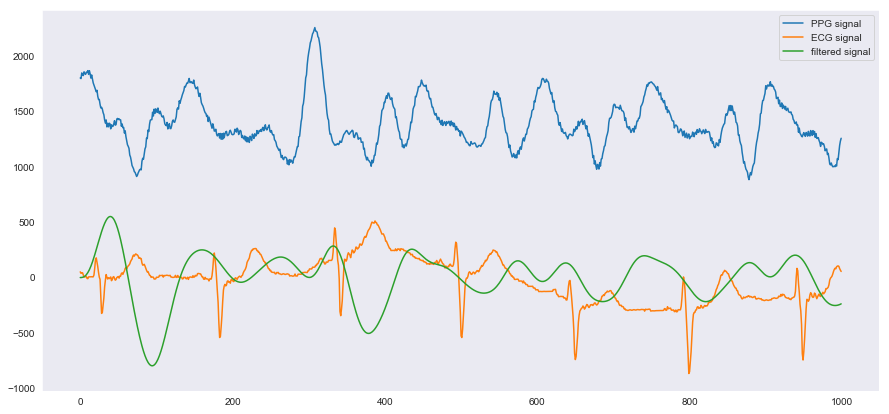

In [8]:
plt.figure(figsize=(15,7))
plt.plot(df['wrist_ppg'][:1000], label='PPG signal')
plt.plot(df['chest_ecg'][:1000], label='ECG signal')
plt.plot(df['filtered'][:1000], label='filtered signal')
plt.legend()
plt.show()

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = df.dropna(axis=0)
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


## Correlation

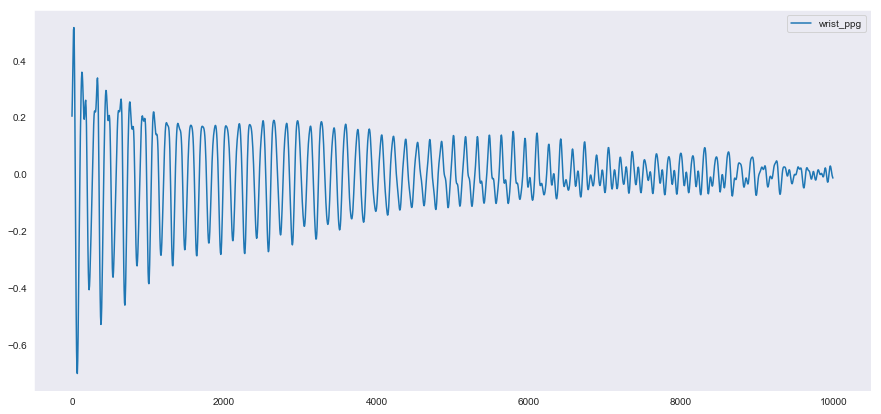

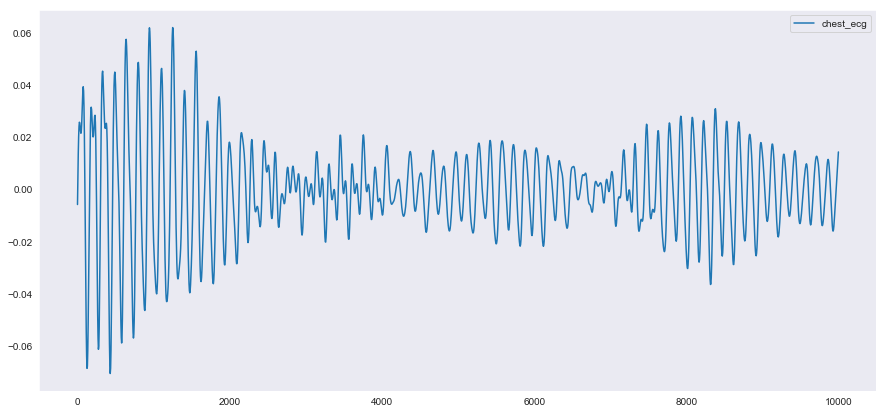

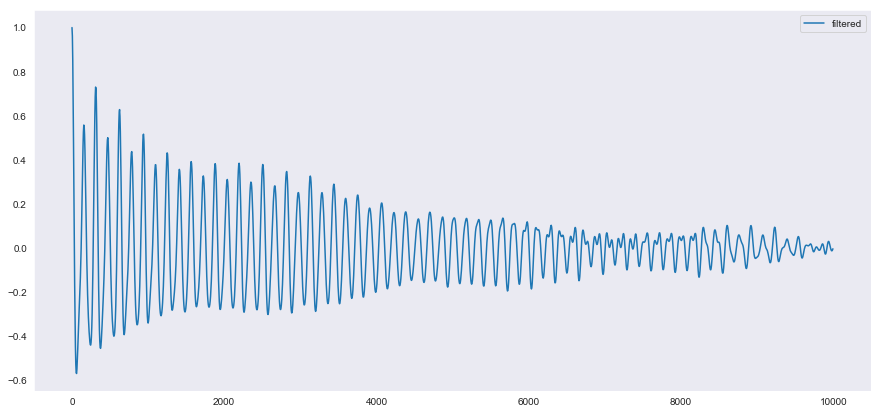

In [10]:
col = ['wrist_ppg', 'chest_ecg', 'filtered'] # for all do: df_scaled.columns[1:]
for j in col:
    plt.figure(figsize=(15, 7))
    plt.plot([5*i for i in range(2000)],[df_scaled.iloc[:,0].corr(df_scaled[j].shift(5*i)) for i in range(2000)], label=j)
    plt.legend()
    plt.show()


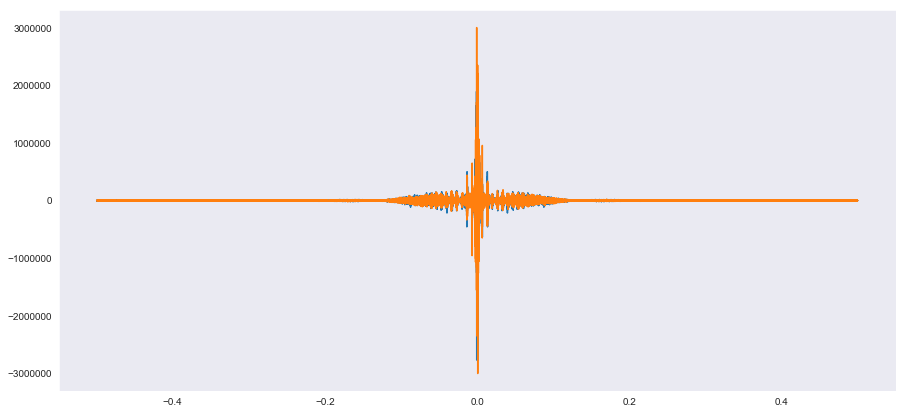

In [11]:
import numpy as np

sp = np.fft.fft(df['chest_ecg'])
freq = np.fft.fftfreq(df.shape[0])
plt.figure(figsize=(15, 7))
plt.plot(freq, sp.real, freq, sp.imag)
plt.show()

In [17]:
## ignore this

#ps = np.abs(np.fft.fft(y))**2
#time_step = 1/256 
#freqs = np.fft.fftfreq(y.size, time_step)
#idx = np.argsort(freqs)
#plt.xlim([0,5])
#plt.plot(freqs[idx], np.log(ps[idx]))
#plt.show()
 #plt.semilogy(freqs[idx], ps[idx])
#plt.plot(y)
#plt.xlim([0,1000])

NameError: name 'y' is not defined

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import detrend,find_peaks

col = 'filtered' # before wrist_ppg
y=df[col].dropna()-(df[col].dropna()).mean()
y=detrend(y)

## peaks detection by a sliding window

In [18]:
def Max(arr, k): 
    maxx = -1
    n=len(arr)
    peaks=[]
    
    for i in range(n - k + 1): 
        maxx = i 
        for j in range(1, k): 
            if arr[i+j] > arr[maxx]: 
                maxx = i + j
       
        if len(peaks)==0 or abs(maxx-peaks[-1])>20:
            peaks.append(maxx)
        
    return(peaks)

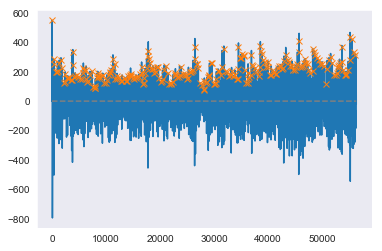

In [32]:
peaks=np.array(Max(y,400))
plt.plot(y)

plt.plot(peaks, y[peaks], "x")
plt.plot(np.zeros_like(y), "--", color="gray")
plt.show()

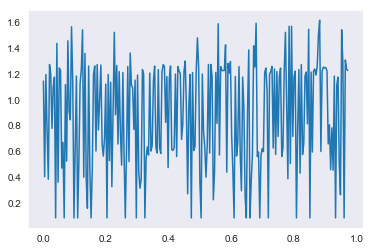

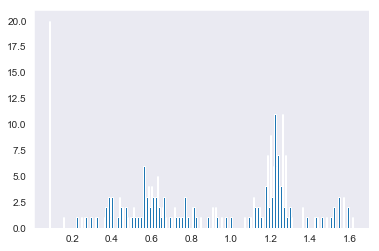

In [33]:
distance=peaks[1:]-peaks[:-1]
plt.plot(np.arange(len(distance))/256, distance/256)
plt.show()
plt.hist(distance/256, bins=200)
plt.show()

## peaks detection by python library

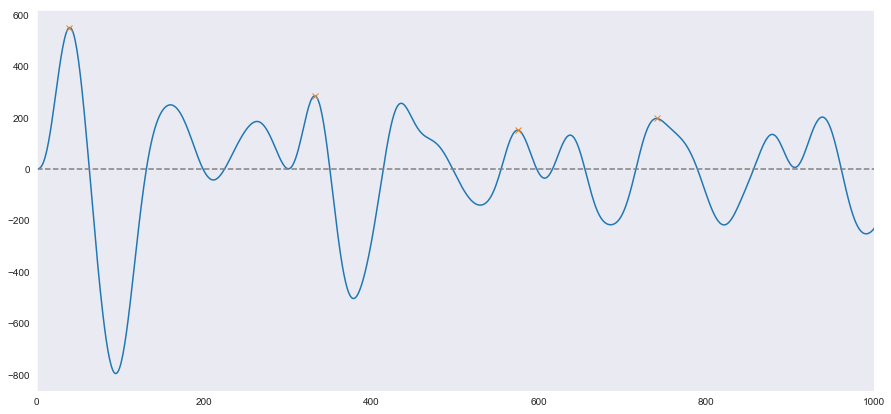

In [16]:
from scipy.signal import detrend,find_peaks

plt.figure(figsize=(15, 7))
peaks, _ = find_peaks(y,distance=160, prominence=1, width=15)
plt.plot(y)
plt.plot(peaks, y[peaks], "x")
plt.plot(np.zeros_like(y), "--", color="gray")
plt.xlim(right=1000, left=0) # set the window the zoom
plt.show()


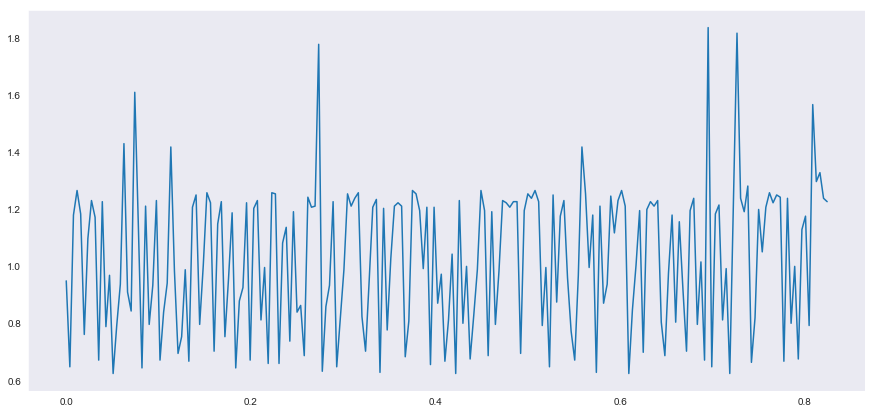

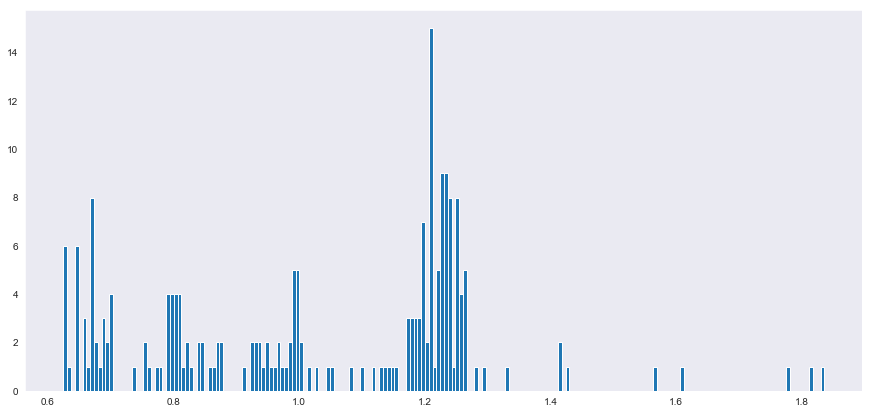

In [18]:
distance=peaks[1:]-peaks[:-1]
w=1
distance=pd.DataFrame(distance).rolling(w).mean()[w:].values.reshape(1,-1)[0]
plt.figure(figsize=(15, 7))
plt.plot(np.arange(len(distance))/256, distance/256)
plt.show()
plt.figure(figsize=(15, 7))
plt.hist(distance/256, bins=200)
plt.show()

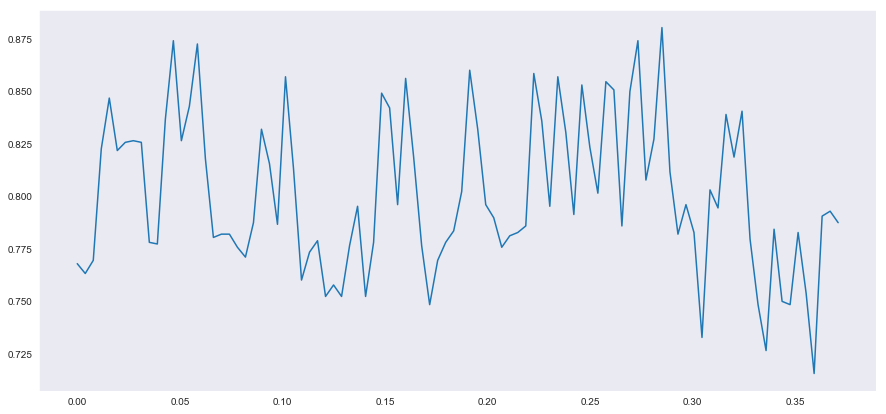

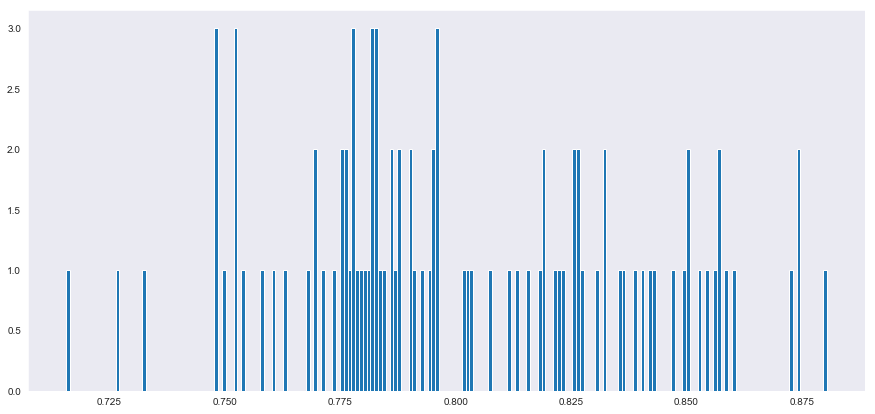

In [19]:
distance=peaks[1:]-peaks[:-1]

distance= np.array([x for x in distance if x <= 256])

w=5
distance=pd.DataFrame(distance).rolling(w).mean()[w:].values.reshape(1,-1)[0]
plt.figure(figsize=(15, 7))
plt.plot(np.arange(len(distance))/256, distance/256)
plt.show()
plt.figure(figsize=(15, 7))
plt.hist(distance/256, bins=200)
plt.show()

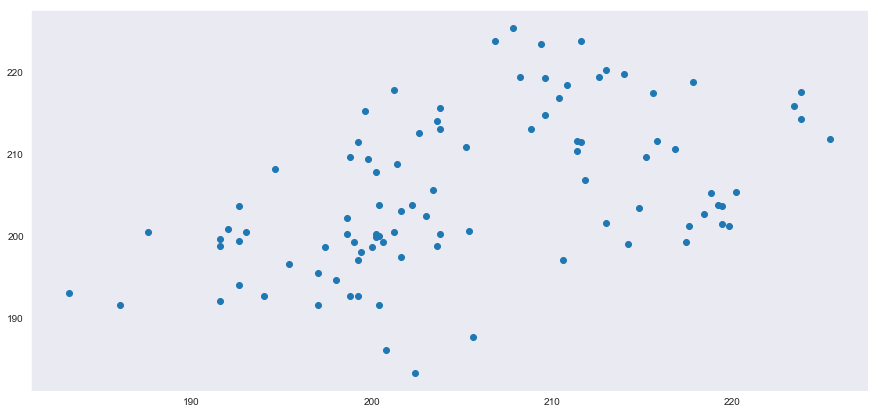

In [21]:
plt.figure(figsize=(15, 7))
plt.scatter(distance[1:], distance[:-1])
plt.show()

# TFT

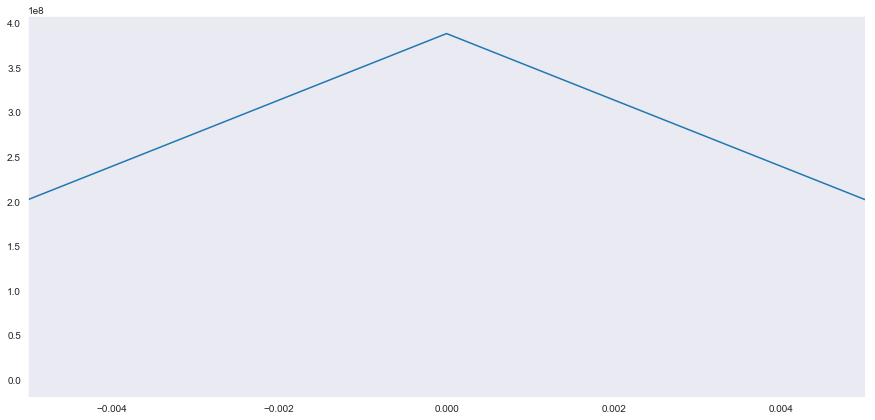

In [22]:
ps = np.abs(np.fft.fft(distance))**2

time_step = 1 
freqs = np.fft.fftfreq(distance.size, time_step)
idx = np.argsort(freqs)
plt.figure(figsize=(15, 7))
plt.xlim([-0.005,0.005])
plt.plot(freqs[idx], ps[idx])
plt.show()